# Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
from zipfile import ZipFile

# Load the Dataset

In [ ]:
!unzip /content/unclean_dataset.zip -d ./v2noc

Streaming output truncated to the last 5000 lines.
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (32).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (33).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (34).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (35).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (36).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (37).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (38).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (39).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (4).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (40).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (41).png  
 extracting: ./v2noc/unclean_dataset/Positive/012B_png/20220211_012B (

In [ ]:
# # #read all paths of images
# import glob
# test_positive_paths = glob.glob('/content/Leptospirosis_data/Test/Positive/*')
# test_negative_paths = glob.glob('/content/Leptospirosis_data/Test/Negative/*')
# train_positive_paths = glob.glob('/content/Leptospirosis_data/Train_Val/Positive/*')
# train_negative_paths = glob.glob('/content/Leptospirosis_data/Train_Val/Negative/*')

In [ ]:
# positive = test_positive_paths+train_positive_paths
# negative = test_negative_paths+train_negative_paths
# len(negative)

In [ ]:
# p =set([t.split('/')[-1] for t in positive])
# n =set([t.split('/')[-1] for t in negative])

# len(p), len(n)

In [ ]:
# test_positive_paths[0]

In [ ]:
import glob
positive = glob.glob('/content/v2noc/unclean_dataset/Positive/**/*')
negative = glob.glob('/content/v2noc/unclean_dataset/Negative/**/*')
len(positive), len(negative)

(5758, 5486)

In [ ]:
positive[:20]

['/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (71).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (62).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (5).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (47).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (80).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (2).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (7).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (30).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (31).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (24).png',
 '/content/v2noc/unclean_dataset/Positive/Single A74_png/20220131_Single A74 (28).png',
 '/content/v2noc/unclean_dataset/Po

In [ ]:
# from sklearn.utils import shuffle
# shuffled_positive = shuffle(positive, random_state=999)
# cut_positive = shuffled_positive[:len(negative)]
# len(cut_positive), len(negative)

In [ ]:
from sklearn.model_selection import train_test_split
train_val_pos, test_pos = train_test_split(positive, test_size=0.30, random_state=99)
train_val_neg, test_neg = train_test_split(negative, test_size=0.30, random_state=99)
len(train_val_neg), len(test_neg), len(train_val_pos), len(test_pos)

(3840, 1646, 4030, 1728)

In [ ]:
!rm -r ./LeptoV3

rm: cannot remove './LeptoV3': No such file or directory


In [ ]:
!mkdir ./LeptoV3
!mkdir ./LeptoV3/Test
!mkdir ./LeptoV3/Train_Val
!mkdir ./LeptoV3/Test/Positive
!mkdir ./LeptoV3/Train_Val/Positive
!mkdir ./LeptoV3/Test/Negative
!mkdir ./LeptoV3/Train_Val/Negative

In [ ]:
import shutil
dest_dir = './LeptoV3/Test/Positive/'
for filename in test_pos:
    shutil.copy(filename, dest_dir)

dest_dir = './LeptoV3/Test/Negative/'
for filename in test_neg:
    shutil.copy(filename, dest_dir)

dest_dir = './LeptoV3/Train_Val/Positive/'
for filename in train_val_pos:
    shutil.copy(filename, dest_dir)

dest_dir = './LeptoV3/Train_Val/Negative/'
for filename in train_val_neg:
    shutil.copy(filename, dest_dir)

In [ ]:
len(glob.glob('/content/LeptoV3/Train_Val/Positive/*'))

4030

In [ ]:
import albumentations as A
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from cv2 import imread
def load_image(file_path):
    #file_path = image_id
    image = imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
albumentationAug = A.Compose([
                              A.Blur(blur_limit=(1,6), p=.6),
                              # A.Rotate(limit = (-10, 10), p = 1)
                              A.ShiftScaleRotate(shift_limit=(-0.1,0.1), scale_limit=0, rotate_limit=(-10, 10), p=.6)
                                     #rotate, crop, noise, shift, zoomin, zoomout, elastic(หยักๆคลื่น), jigsaw)
])

In [ ]:
# image = load_image('/content/LeptoV3/Train_Val/Negative/20220106_M7 (10).png')
# transformed = albumentationAug(image = image)['image']
# im = Image.fromarray(transformed)
# plt.imshow(im)
from tqdm.notebook import tqdm

for f in tqdm(train_val_neg):
  image = load_image(f)

  for i in range(0, 11):
    transformed = albumentationAug(image = image)['image']
    im = Image.fromarray(transformed)
    path = '/content/LeptoV3/Train_Val/Negative/' + f.split('/')[-1].split('.jpg')[0] + '_' + str(i) + '.jpg'
    # print(path)
    im.save(path)

for f in tqdm(train_val_pos):
  image = load_image(f)

  for i in range(0, 2):
    transformed = albumentationAug(image = image)['image']
    im = Image.fromarray(transformed)
    path = '/content/LeptoV3/Train_Val/Positive/' + f.split('/')[-1].split('.jpg')[0] + '_' + str(i) + '.jpg'
    # print(path)
    im.save(path)

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/4030 [00:00<?, ?it/s]

In [ ]:
train_val_neg_editted = glob.glob('/content/LeptoV3/Train_Val/Negative/*')
train_val_pos_editted = glob.glob('/content/LeptoV3/Train_Val/Positive/*')

len(train_val_neg_editted), len(train_val_pos_editted)

(12012, 12090)

In [ ]:
!zip -r /content/CleanV2_upnoclach.zip /content/LeptoV3

Streaming output truncated to the last 5000 lines.
  adding: content/LeptoV3/Train_Val/Negative/20220131_NMF26 (28).png_6.jpg (deflated 7%)
  adding: content/LeptoV3/Train_Val/Negative/20220211_97 (43).png_7.jpg (deflated 4%)
  adding: content/LeptoV3/Train_Val/Negative/20220118_HBB15 (30).png_2.jpg (deflated 5%)
  adding: content/LeptoV3/Train_Val/Negative/20220118_NMF20 (12).png_6.jpg (deflated 5%)
  adding: content/LeptoV3/Train_Val/Negative/20220211_95 (49).png_4.jpg (deflated 4%)
  adding: content/LeptoV3/Train_Val/Negative/20220118_NMF24 (73).png_9.jpg (deflated 6%)
  adding: content/LeptoV3/Train_Val/Negative/20220106_M7 (17).png_6.jpg (deflated 8%)
  adding: content/LeptoV3/Train_Val/Negative/20220106_M7 (58).png_0.jpg (deflated 9%)
  adding: content/LeptoV3/Train_Val/Negative/20220211_97 (11).png_2.jpg (deflated 4%)
  adding: content/LeptoV3/Train_Val/Negative/20220211_97 (6).png_7.jpg (deflated 9%)
  adding: content/LeptoV3/Train_Val/Negative/20220131_HBB24 (36).png_0.jpg (de

In [ ]:
!pip -qq install paramiko

     |████████████████████████████████| 211 kB 14.3 MB/s 
     |████████████████████████████████| 856 kB 62.8 MB/s 
     |████████████████████████████████| 3.6 MB 56.7 MB/s 
     |████████████████████████████████| 61 kB 557 kB/s 


In [ ]:
import paramiko

def upload(filepath):
    filename = filepath.split("/")[-1]
    transport = paramiko.Transport(("server2.bsthun.com", 6500))
    transport.connect(username = "root", password = "trp0843840477")
    sftp = paramiko.SFTPClient.from_transport(transport)
    sftp.put(filepath, "/var/www/html/Fai_folder/LatestModel/" + filename.split('/')[-1])
    sftp.close()
    transport.close()


upload("/content/EfficientV2_v2unoc2.zip")

# Image Generator

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import tensorflow_hub as hub
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
!rmdir /content/LeptoV3/Train_Val/.ipynb_checkpoints
!rmdir /content/LeptoV3/Test/.ipynb_checkpoints

rmdir: failed to remove '/content/LeptoV3/Train_Val/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/LeptoV3/Test/.ipynb_checkpoints': No such file or directory


In [ ]:
BATCH_SIZE = 128
IMG_SIZE = (224,224)
IMG_SHAPE =IMG_SIZE+(3,)
_dir = '/content/v2noc/content/LeptoV3/Train_Val'

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255,validation_split = .2)
# train_generator = train_datagen.flow_from_directory(_dir,
#                                                     shuffle = True,
#                                                     batch_size = BATCH_SIZE ,
#                                                     target_size = IMG_SIZE,
#                                                     color_mode = 'rgb',
#                                                     class_mode = 'binary',
#                                                     subset = 'training',
#                                                     seed=999)
# valid_generator = train_datagen.flow_from_directory(_dir,
#                                                     shuffle = True,
#                                                     batch_size = BATCH_SIZE ,
#                                                     target_size = IMG_SIZE,
#                                                     color_mode = 'rgb',
#                                                     class_mode = 'binary',
#                                                     subset = 'validation',
#                                                     seed=999)
train_datagen = ImageDataGenerator(dtype='float32',validation_split = .2, 
                                   preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_generator = train_datagen.flow_from_directory(_dir,
                                                    shuffle = True,
                                                    batch_size = BATCH_SIZE ,
                                                    target_size = IMG_SIZE,
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary',
                                                    subset = 'training',
                                                    seed=999)
valid_generator = train_datagen.flow_from_directory(_dir,
                                                    shuffle = True,
                                                    batch_size = BATCH_SIZE ,
                                                    target_size = IMG_SIZE,
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary',
                                                    subset = 'validation',
                                                    seed=999)

Found 19282 images belonging to 2 classes.
Found 4820 images belonging to 2 classes.


In [ ]:
# confirm the iterator works
batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(128, 224, 224, 3), min=0.000, max=255.000


In [ ]:
valid_generator.class_indices

{'Negative': 0, 'Positive': 1}

# Model

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
# url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
# base_model = hub.KerasLayer(url, input_shape=IMG_SHAPE, trainable=False)

In [ ]:
# base_model = tf.keras.applications.InceptionV3(
#     input_shape=(224,224,3),
#     include_top=False,
#     weights="imagenet")
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet")

In [ ]:
# for l in base_model.layers[:12]:
#   l.trainable = False
base_model.trainable = False

In [ ]:
# base_model.summary()

In [ ]:
model=tf.keras.Sequential([
                           base_model,
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation = 'relu'),
                           tf.keras.layers.Dropout(.7),
                           tf.keras.layers.Dense(125, activation = 'relu'),
                           tf.keras.layers.Dropout(.7),
                           tf.keras.layers.Dense(64, activation = 'relu'),
                           tf.keras.layers.Dropout(.5),
                           tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_15 (Dense)            (None, 512)               32113152  
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 125)               64125     
                                                                 
 dropout_12 (Dropout)        (None, 125)               0         
                                                      

In [ ]:
# model = tf.keras.Sequential([
#                              tf.keras.layers.InputLayer(input_shape=(256,256,1)),
#                              tf.keras.layers.Conv2D(32,(3,3), strides=(1,1)),
#                              tf.keras.layers.MaxPool2D((2,2), strides = (2,2)),
#                              tf.keras.layers.Conv2D(64,(3,3), strides=(1,1)),
#                              tf.keras.layers.MaxPool2D((2,2), strides = (2,2)),
#                              tf.keras.layers.Conv2D(128,(3,3), strides=(1,1)),
#                              tf.keras.layers.MaxPool2D((2,2), strides = (2,2)),
#                              tf.keras.layers.Flatten(),
#                              tf.keras.layers.Dense(512, activation = 'relu'),
#                              tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [ ]:
learning_rate=1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/InceptionV3_Original', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [ ]:
epochs=10
history=model.fit(train_generator,
                  epochs=epochs,
                  validation_data=valid_generator,
                  callbacks=callbacks)

Epoch 1/10
151/151 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.8660
Epoch 1: val_loss improved from inf to 0.27033, saving model to /content/InceptionV3_Original


INFO:tensorflow:Assets written to: /content/InceptionV3_Original/assets


INFO:tensorflow:Assets written to: /content/InceptionV3_Original/assets


151/151 [==============================] - 178s 1s/step - loss: 0.2889 - accuracy: 0.8660 - val_loss: 0.2703 - val_accuracy: 0.8689
Epoch 2/10
151/151 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9370
Epoch 2: val_loss did not improve from 0.27033
151/151 [==============================] - 131s 869ms/step - loss: 0.1475 - accuracy: 0.9370 - val_loss: 0.3017 - val_accuracy: 0.8830
Epoch 3/10
151/151 [==============================] - ETA: 0s - loss: 0.0887 - accuracy: 0.9620
Epoch 3: val_loss did not improve from 0.27033
151/151 [==============================] - 131s 869ms/step - loss: 0.0887 - accuracy: 0.9620 - val_loss: 0.3581 - val_accuracy: 0.8805
Epoch 4/10
151/151 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9730
Epoch 4: val_loss did not improve from 0.27033
151/151 [==============================] - 131s 867ms/step - loss: 0.0646 - accuracy: 0.9730 - val_loss: 0.4989 - val_accuracy: 0.8776
Epoch 5/10
151/151 [==============

# Evaluate

In [ ]:
# !unzip /content/EfficientNetV2B0_Original.zip -d ./eff 
!unzip /content/InceptionV3_Original.zip -d ./inc
# !unzip /content/MobileNetV2_Original.zip -d ./mob

Archive:  /content/InceptionV3_Original.zip
   creating: ./inc/content/InceptionV3_Original/
  inflating: ./inc/content/InceptionV3_Original/saved_model.pb  
  inflating: ./inc/content/InceptionV3_Original/keras_metadata.pb  
   creating: ./inc/content/InceptionV3_Original/assets/
   creating: ./inc/content/InceptionV3_Original/variables/
  inflating: ./inc/content/InceptionV3_Original/variables/variables.data-00000-of-00001  
  inflating: ./inc/content/InceptionV3_Original/variables/variables.index  


In [ ]:
# test_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(dtype='float32',validation_split = .2, 
                                   preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_generator = test_datagen.flow_from_directory('/content/LeptoV3/Test',
                                                    shuffle = False,
                                                    batch_size = BATCH_SIZE ,
                                                    target_size = IMG_SIZE,
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary',
                                                    seed=999)

Found 3362 images belonging to 2 classes.


In [ ]:
best_model = tf.keras.models.load_model('/content/mob/content/InceptionV3_Original')

In [ ]:
results = best_model.predict(test_generator)

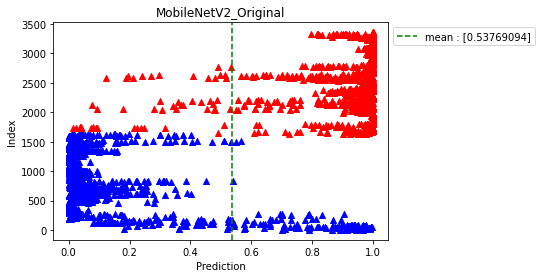

In [ ]:
import matplotlib.pyplot as plt

for i in range (0,len(results)):
  if test_generator.classes[i] == 1:
    plt.scatter(results[i],i, c='red', marker = '^')
  else:
    plt.scatter(results[i],i, c='blue', marker = '^')

# plt.scatter(results[0],0)
# plt.scatter(results[1],1)

# # list(range(1,len(results)+1)
plt.axvline(x=sum(results)/len(results), color='g',ls='--', label = 'mean : '+str(sum(results)/len(results)))
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('MobileNetV2_Original')
plt.xlabel('Prediction')
plt.ylabel('Index')
plt.show()

In [ ]:
results1 = results.copy()

In [ ]:
results1 = [1 if r[0]>=sum(results)/len(results) else 0 for r in results]

In [ ]:
# test_generator.classes, results
from sklearn.metrics import confusion_matrix
# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]
conf_arr = confusion_matrix(test_generator.classes, results1)
conf_arr

array([[1520,  114],
       [  52, 1676]])

In [ ]:
results1 = results.copy()

In [ ]:
results1 = [1 if r[0]>=0.5 else 0 for r in results]

In [ ]:
# test_generator.classes, results
from sklearn.metrics import confusion_matrix
# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]
conf_arr = confusion_matrix(test_generator.classes, results1)
conf_arr

array([[1509,  125],
       [  47, 1681]])

In [ ]:
test_generator.class_indices

{'Negative': 0, 'Positive': 1}

In [ ]:
# best_model.save('vgg16model_v1noc')

In [ ]:
!zip -r /content/EfficientV2_v2unoc2.zip /content/InceptionV3_Original

  adding: content/InceptionV3_Original/ (stored 0%)
  adding: content/InceptionV3_Original/variables/ (stored 0%)
  adding: content/InceptionV3_Original/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/InceptionV3_Original/variables/variables.index (deflated 75%)
  adding: content/InceptionV3_Original/assets/ (stored 0%)
  adding: content/InceptionV3_Original/keras_metadata.pb (deflated 96%)
  adding: content/InceptionV3_Original/saved_model.pb (deflated 92%)


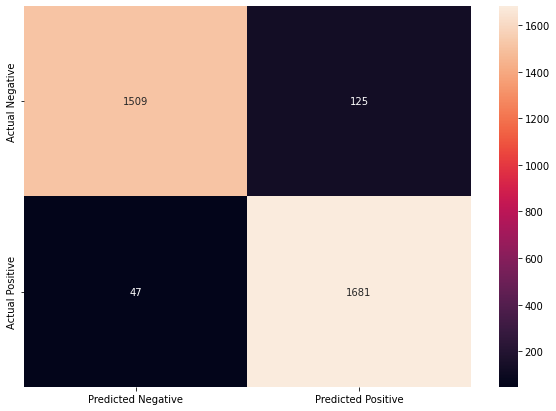

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(conf_arr, index = [i for i in ['Actual Negative', 'Actual Positive']],
                  columns = [i for i in ['Predicted Negative', 'Predicted Positive']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

# GradCam

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

tt = glob.glob('/content/Leptospirosis_data/Test/Negative/*')

for i in tt[:10]:
  #load the image
  my_image = load_img(i, target_size=(224, 224))
  #preprocess the image
  my_image = img_to_array(my_image)
  my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
  my_image = preprocess_input(my_image)

  #make the prediction
  prediction = model.predict(my_image)
  print(i, [1 if r[0]>=0.5 else 0 for r in prediction])

/content/Leptospirosis_data/Test/Negative/20220106_HBB7 (2).png [1]
/content/Leptospirosis_data/Test/Negative/20220211_197 (56).png [0]
/content/Leptospirosis_data/Test/Negative/20220106_M7 (53).png [1]
/content/Leptospirosis_data/Test/Negative/20220106_HBB6 (78).png [1]
/content/Leptospirosis_data/Test/Negative/20220106_NMF1 (55).png [1]
/content/Leptospirosis_data/Test/Negative/20220106_NMF2 (3).png [0]
/content/Leptospirosis_data/Test/Negative/20220106_M7 (79).png [0]
/content/Leptospirosis_data/Test/Negative/20220118_NMF12 (65).png [0]
/content/Leptospirosis_data/Test/Negative/20220211_203 (41).png [0]
/content/Leptospirosis_data/Test/Negative/20220211_195 (18).png [0]


In [ ]:
print(prediction)
print([1 if r[0]>=0.5 else 0 for r in prediction])

[[0.4354247]]
[0]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


# Dark Area (Don't Run)

## Ajarn

In [ ]:
with ZipFile('drive/MyDrive/Tensorflow Workshop/cats_and_dogs.zip') as zip_ref :
  zip_ref.extractall('/content')

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160,160)
IMG_SHAPE =IMG_SIZE+(3,)
train_dir = 'cats_and_dogs/train'
validation_dir='cats_and_dogs/validation'

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                                      shuffle = True,
                                                                                      batch_size = BATCH_SIZE ,
                                                                                      image_size = IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                                      shuffle = True,
                                                                                      batch_size = BATCH_SIZE ,
                                                                                      image_size = IMG_SIZE)

Found 1000 files belonging to 2 classes.


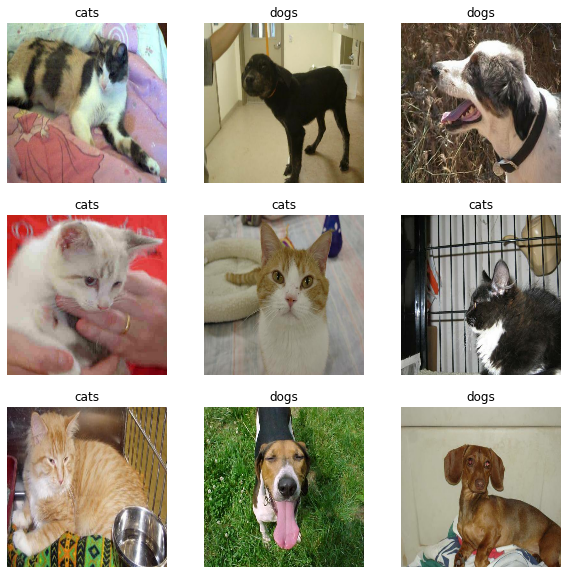

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize = (10,10))
for images,labels in train_dataset.take(1) :
  for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

## Build the Model

### Load the base model

In [ ]:
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                                                 include_top=False,
                                                                 weights='imagenet')

In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 166, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 80, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 80, 80, 64)   256         ['conv1_conv[0][0]']      

### Add the classification head

In [ ]:
model=tf.keras.Sequential([
                           base_model,
                           tf.keras.layers.GlobalAveragePooling2D(),
                           tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


### Compile the model

In [ ]:
learning_rate=0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])

In [ ]:
epochs=2
history=model.fit(train_dataset,
                         epochs=epochs,
                         validation_data=validation_dataset)

Epoch 1/2
63/63 [==============================] - 254s 4s/step - loss: 0.6121 - accuracy: 0.6805 - val_loss: 0.4368 - val_accuracy: 0.7960
Epoch 2/2
63/63 [==============================] - 246s 4s/step - loss: 0.3470 - accuracy: 0.8565 - val_loss: 0.2930 - val_accuracy: 0.8840


## Evaluation the model

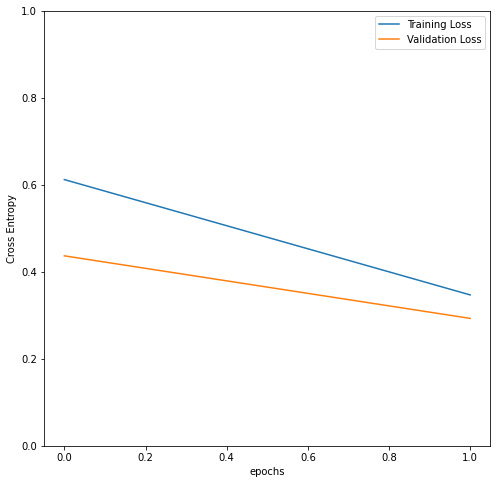

In [ ]:
plt.figure(figsize=(8,8))
plt.plot((history.history['loss']), label='Training Loss')
plt.plot((history.history['val_loss']), label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')
plt.show()

## Split Data to Folders

In [ ]:
!mkdir ./Leptospirosis_data
!mkdir ./Leptospirosis_data/Test
!mkdir ./Leptospirosis_data/Train_Val
!mkdir ./Leptospirosis_data/Test/Positive
!mkdir ./Leptospirosis_data/Test/Negative
!mkdir ./Leptospirosis_data/Train_Val/Positive
!mkdir ./Leptospirosis_data/Train_Val/Negative

In [ ]:
from sklearn.model_selection import train_test_split

neg_train, neg_test = train_test_split(negative_paths, test_size=0.3, random_state = 99)
pos_train, pos_test = train_test_split(positive_paths, test_size=0.3, random_state = 99)

In [ ]:
len(pos_train), len(pos_test)

(4030, 1728)

In [ ]:
train_dest = ['/content/Leptospirosis_data/Train_Val/Positive','/content/Leptospirosis_data/Train_Val/Negative']
test_dest = ['/content/Leptospirosis_data/Test/Positive','/content/Leptospirosis_data/Test/Negative']

In [ ]:
import shutil
from tqdm.notebook import tqdm

for f in tqdm(neg_train):
  try:
    shutil.move(f, train_dest[1])
  except:
    print(f,train_dest[1])
print('###############################')
for f in tqdm(pos_train):
  try:
    shutil.move(f, train_dest[0])
  except:
    print(f,train_dest[0])
print('###############################')
for f in tqdm(neg_test):
  try:
    shutil.move(f, test_dest[1])
  except:
    print(f,test_dest[1])
print('###############################')
for f in tqdm(pos_test):
  try:
    shutil.move(f, test_dest[0])
  except:
    print(f,test_dest[0])


  0%|          | 0/3840 [00:00<?, ?it/s]

/content/dataset/Negative/99_png/20220211_99 (12).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/212_png/20220211_99 (53).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/99_png/20220211_99 (61).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/212_png/20220211_99 (54).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/212_png/20220211_99 (1).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/99_png/20220211_99 (43).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/99_png/20220211_99 (30).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/99_png/20220211_99 (39).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/99_png/20220211_99 (13).png /content/Leptospirosis_data/Train_Val/Negative
/content/dataset/Negative/212_png/20220211_99 (67).png /content/Leptospirosis_data/Train_

  0%|          | 0/4030 [00:00<?, ?it/s]

###############################


  0%|          | 0/1646 [00:00<?, ?it/s]

/content/dataset/Negative/212_png/20220211_99 (8).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/212_png/20220211_99 (62).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/99_png/20220211_99 (47).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/99_png/20220211_99 (49).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/212_png/20220211_99 (19).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/99_png/20220211_99 (48).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/99_png/20220211_99 (45).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/212_png/20220211_99 (36).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/99_png/20220211_99 (44).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/99_png/20220211_99 (34).png /content/Leptospirosis_data/Test/Negative
/content/dataset/Negative/99_png/2022

  0%|          | 0/1728 [00:00<?, ?it/s]

In [ ]:
# dest = '/content/Dataset/Negative'

# for f in tqdm(negative_paths):
#   try:
#     shutil.move(f, dest)
#   except:
#     pass

  0%|          | 0/5486 [00:00<?, ?it/s]

In [ ]:
!zip -r /content/Leptospirosis_data.zip ./

Streaming output truncated to the last 5000 lines.
  adding: dt/Positive/20220211_046B (74).png (deflated 2%)
  adding: dt/Positive/20220118_056A (38).png (deflated 2%)
  adding: dt/Positive/20220118_056A (46).png (deflated 2%)
  adding: dt/Positive/20220211_043B (45).png (deflated 0%)
  adding: dt/Positive/20220118_002B (5).png (deflated 2%)
  adding: dt/Positive/NKD_4456.png (deflated 2%)
  adding: dt/Positive/20220106_020B (32).png (deflated 0%)
  adding: dt/Positive/20220131_Single A21 (65).png (deflated 0%)
  adding: dt/Positive/20220131_038B (74).png (deflated 1%)
  adding: dt/Positive/20220118_059A (32).png (deflated 2%)
  adding: dt/Positive/20220118_047A (16).png (deflated 2%)
  adding: dt/Positive/20220118_045B (34).png (deflated 2%)
  adding: dt/Positive/20220118_061A (75).png (deflated 2%)
  adding: dt/Positive/20220118_062A (54).png (deflated 2%)
  adding: dt/Positive/20220118_003A (48).png (deflated 0%)
  adding: dt/Positive/20220131_022A (61).png (deflated 1%)
  adding: 

# Analyze Data

In [ ]:
!wget http://mnt.bsthun.com:6511/Fai_folder/clean_dataset.zip

--2022-03-27 12:27:50--  http://mnt.bsthun.com:6511/Fai_folder/clean_dataset.zip
Resolving mnt.bsthun.com (mnt.bsthun.com)... 107.155.65.87
Connecting to mnt.bsthun.com (mnt.bsthun.com)|107.155.65.87|:6511... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3174329928 (3.0G) [application/zip]
Saving to: ‘clean_dataset.zip’

clean_dataset.zip   100%[===================>]   2.96G  16.0MB/s    in 3m 15s  

2022-03-27 12:31:05 (15.5 MB/s) - ‘clean_dataset.zip’ saved [3174329928/3174329928]



In [ ]:
!unzip /content/clean_dataset.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (72).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (73).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (74).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (75).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (76).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (77).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (78).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (79).png  
  inflating: ./clean_dataset/Positive/022A_png/20220131_022A (80).png  
   creating: ./clean_dataset/Positive/023B_png/
  inflating: ./clean_dataset/Positive/023B_png/20220118_023B (1).png  
  inflating: ./clean_dataset/Positive/023B_png/20220118_023B (10).png  
  inflating: ./clean_dataset/Positive/023B_png/20220118_023B (11).png  
  inflating: ./clean_dataset/Positive/

In [ ]:
!pip install profilehooks

In [ ]:
#Normalizaion: Output_channel = 255 * (Input_channel - min) / (max-min)
import sys
import numpy as np
import cv2
from PIL import Image
from profilehooks import profile

def try_numpy(img):
    ar = np.array(img).astype(np.float32)
    for i in range(1000):
        mn = np.min(ar)
        mx = np.max(ar)
        norm = (ar - mn) * (1.0 / (mx - mn))
    

def try_cv2(img):
    for i in range(1000):
        norm = cv2.normalize(img, None, alpha=0, beta=1,
                             norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# img = Image.open('/content/clean_dataset/Negative/195_png/20220211_195 (1).png')
# #try_numpy(img)

img = cv2.imread('/content/clean_dataset/Negative/195_png/20220211_195 (10).png')
try_cv2(img)

In [ ]:
img = np.array(img).astype(np.float32)
norm = (img - np.min(img)) / (np.max(img) - np.min(img))

In [ ]:
norm2 = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [ ]:
from matplotlib.pyplot import imshow
k = Image.fromarray(img, 'RGB')
# k.save('my.png')
imshow(k)

ValueError: ignored

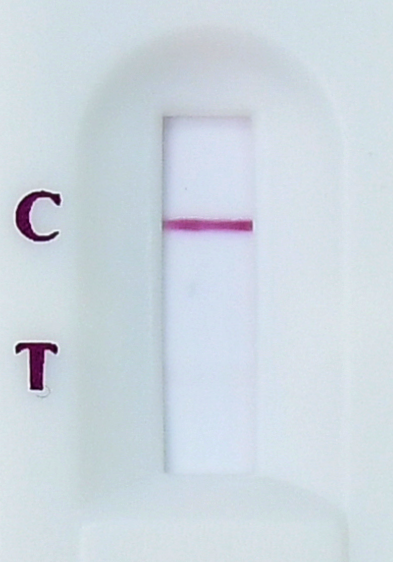

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
img = cv.imread('/content/clean_dataset/Negative/195_png/20220211_195 (1).png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
norm_img = np.zeros((800,800))
final_img = cv.normalize(gray,  norm_img, 0, 255, cv.NORM_MINMAX)
cv2_imshow(img)
cv.imwrite('city_normalized.jpg', img)
cv.waitKey(0)
cv.destroyAllWindows()

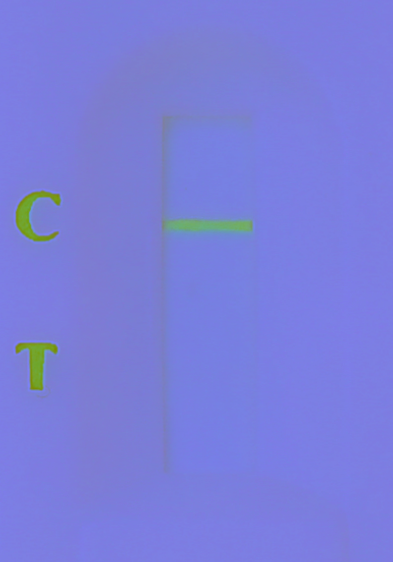

In [ ]:
# ii = cv2.cvtColor(final_img, cv2.COLOR_GRAY2BGR)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

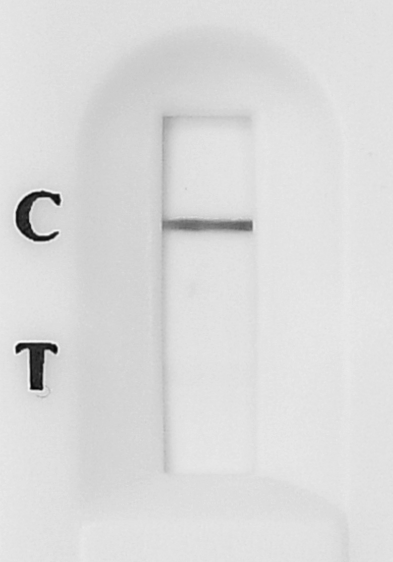

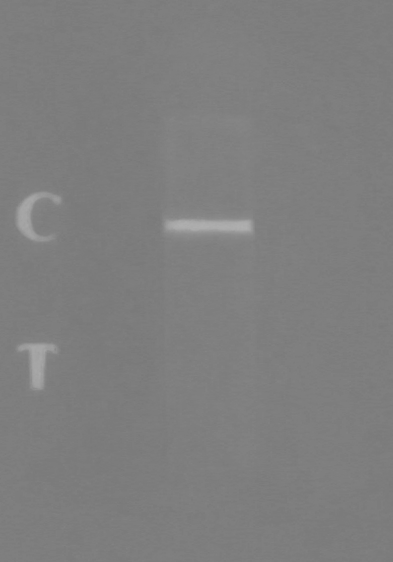

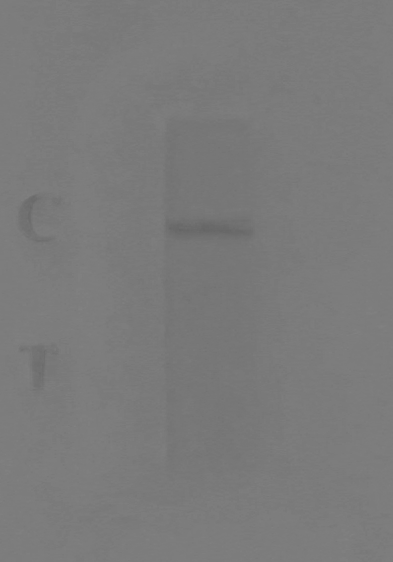

In [ ]:
l, a, b = cv2.split(lab)
cv2_imshow(l)
cv2_imshow(a)
cv2_imshow(b)

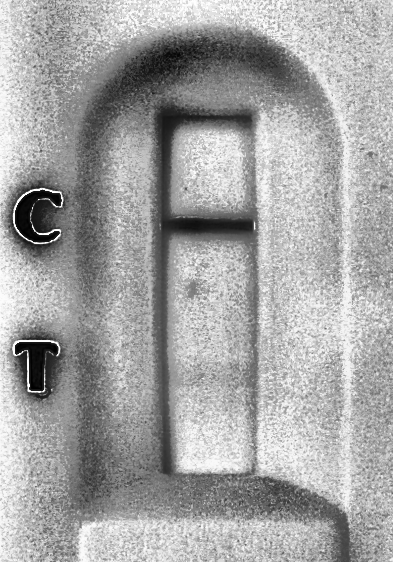

In [ ]:
clahe = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(5,5))
cl = clahe.apply(l)
cv2_imshow(cl)

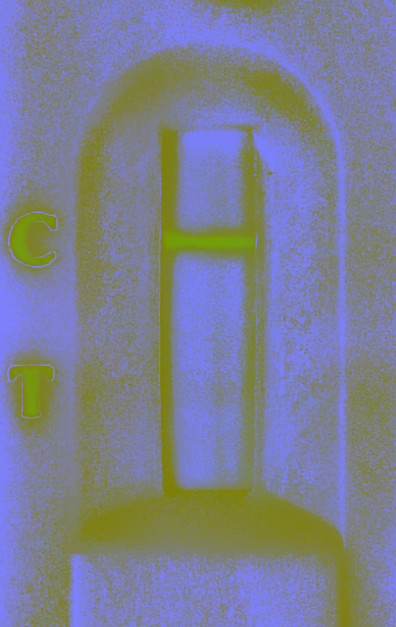

In [ ]:
#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2_imshow(limg)

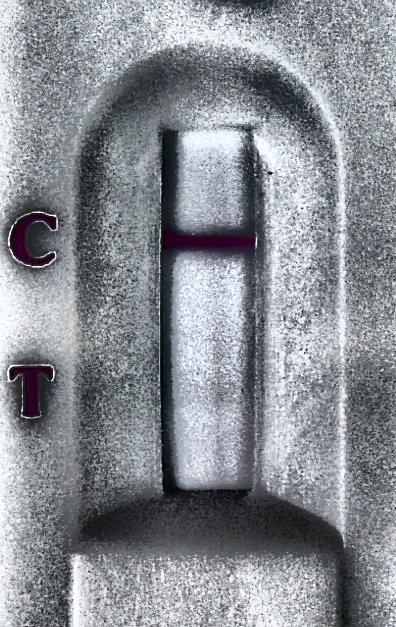

In [ ]:
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2_imshow(final)